# House Sales Prediction (Linear Regression)

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


Data used: https://www.kaggle.com/harlfoxem/housesalesprediction

In [28]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# read the csv file 
Data = pd.read_csv('kc_house_data.csv')

In [30]:
Data.shape

(21613, 21)

# Exploratory Data Analysis

In [31]:
Data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_lot,sqft_above,sqft_basement
0,7129300520,20141013T000000,221900.0,3,1.00,1180,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,5650,1180,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,7242,2170,400
2,5631500400,20150225T000000,180000.0,2,1.00,770,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,10000,770,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,5000,1050,910
4,1954400510,20150218T000000,510000.0,3,2.00,1680,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,8080,1680,0


In [32]:
Data.drop('id',axis=1)

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_lot,sqft_above,sqft_basement
0,20141013T000000,221900.0,3,1.00,1180,1.0,0,0,3,7,1955,0,98178,47.5112,-122.257,1340,5650,5650,1180,0
1,20141209T000000,538000.0,3,2.25,2570,2.0,0,0,3,7,1951,1991,98125,47.7210,-122.319,1690,7639,7242,2170,400
2,20150225T000000,180000.0,2,1.00,770,1.0,0,0,3,6,1933,0,98028,47.7379,-122.233,2720,8062,10000,770,0
3,20141209T000000,604000.0,4,3.00,1960,1.0,0,0,5,7,1965,0,98136,47.5208,-122.393,1360,5000,5000,1050,910
4,20150218T000000,510000.0,3,2.00,1680,1.0,0,0,3,8,1987,0,98074,47.6168,-122.045,1800,7503,8080,1680,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,3.0,0,0,3,8,2009,0,98103,47.6993,-122.346,1530,1509,1131,1530,0
21609,20150223T000000,400000.0,4,2.50,2310,2.0,0,0,3,8,2014,0,98146,47.5107,-122.362,1830,7200,5813,2310,0
21610,20140623T000000,402101.0,2,0.75,1020,2.0,0,0,3,7,2009,0,98144,47.5944,-122.299,1020,2007,1350,1020,0
21611,20150116T000000,400000.0,3,2.50,1600,2.0,0,0,3,8,2004,0,98027,47.5345,-122.069,1410,1287,2388,1600,0


In [33]:
#get some information about our DataSet
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  sqft_l

In [34]:
Data.describe()

,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_lot,sqft_above,sqft_basement
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.494309,0.007542,0.234303,3.409430,7.656873,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,1.510697e+04,1788.390691,291.509045
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,0.539989,0.086517,0.766318,0.650743,1.175459,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,4.142051e+04,828.090978,442.575043
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,5.200000e+02,290.000000,0.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,5.040000e+03,1190.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,7.618000e+03,1560.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,0.000000,4.000000,8.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,1.068800e+04,2210.000000,560.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,1.000000,4.000000,5.000000,13.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.651359e+06,9410.000000,4820.000000


In [35]:
# let's drop unnecessory featurs
Data = Data.drop('id',axis=1)
Data = Data.drop('zipcode',axis=1)

In [36]:
# check if there are any Null values
Data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
waterfront       0
view             0
condition        0
grade            0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
sqft_lot         0
sqft_above       0
sqft_basement    0
dtype: int64

<AxesSubplot:xlabel='price', ylabel='Count'>

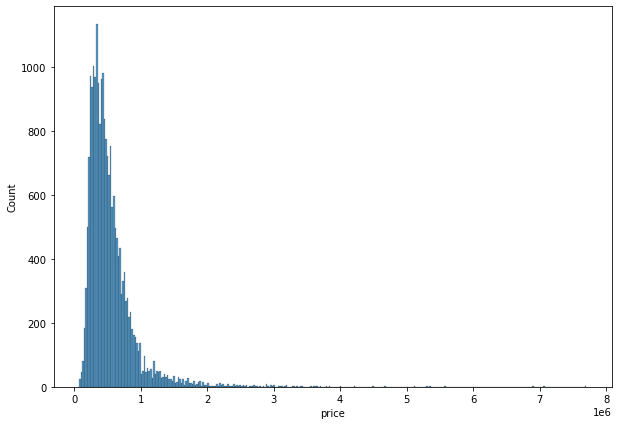

In [37]:
#visualizing house prices
plt.figure(figsize=(10,7))
sns.histplot(Data['price'])

<AxesSubplot:xlabel='price'>

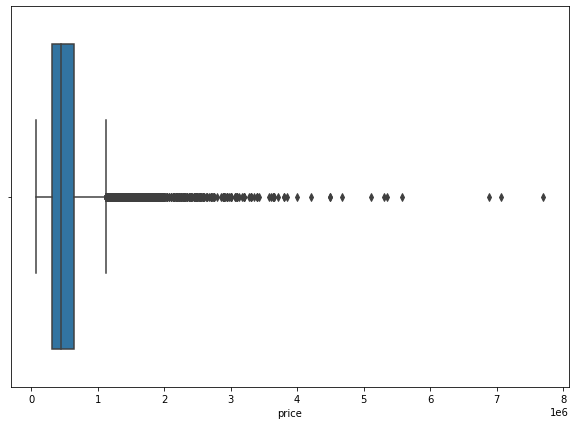

In [38]:
plt.figure(figsize=(10,7))
sns.boxplot(x=Data['price'])


In [43]:
def remove_outliers(df):
    #print(df)
    data=df['price']
    #print(data)
    q1=data.quantile(0.25)
    #print(q1)
    q3=data.quantile(0.75)
    #print(q3)
    iqr=q3-q1
    #print(iqr)
    df[(data<(q1-1.5*iqr))|(data>(q3+1.5*iqr))]=np.nan
    df=df.dropna()
    return df

Datawithoutoutlier=remove_outliers(Data)  
print(Datawithoutoutlier.shape)
print(Data.shape)  

(20194, 19)
(21613, 19)


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

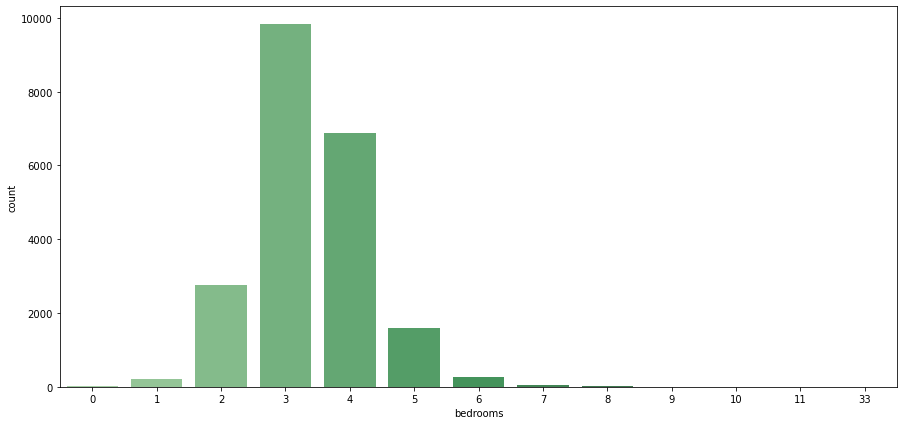

In [ ]:
#visualizing bedrooms, bathrooms, floors,grades
plt.figure(figsize=(15,7))
sns.countplot(x=Data['bedrooms'], palette = 'Greens_d')

<AxesSubplot:xlabel='floors', ylabel='count'>

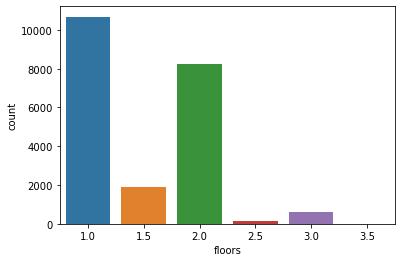

In [ ]:
sns.countplot(x=Data['floors'])

<AxesSubplot:xlabel='bathrooms', ylabel='count'>

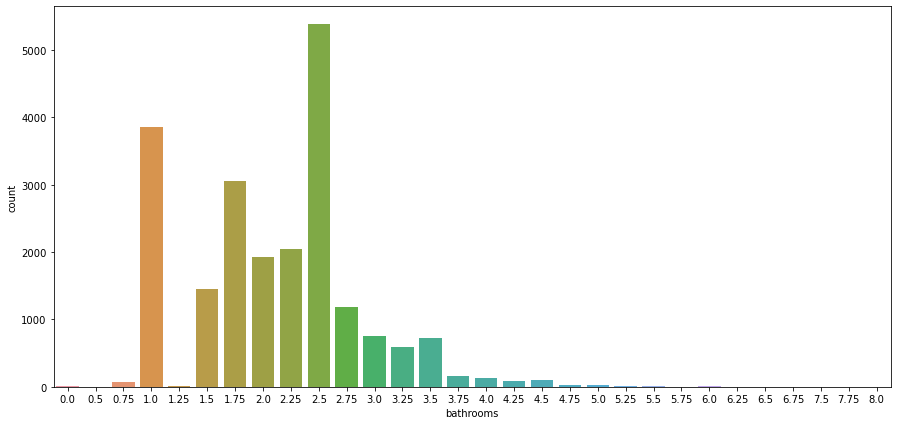

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(x=Data['bathrooms'])

<AxesSubplot:xlabel='grade', ylabel='count'>

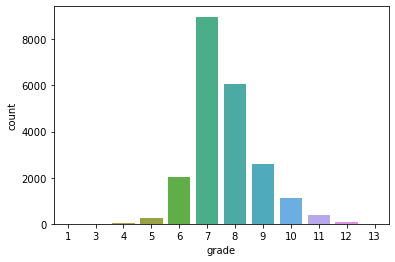

In [ ]:
sns.countplot(x=Data['grade'])

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

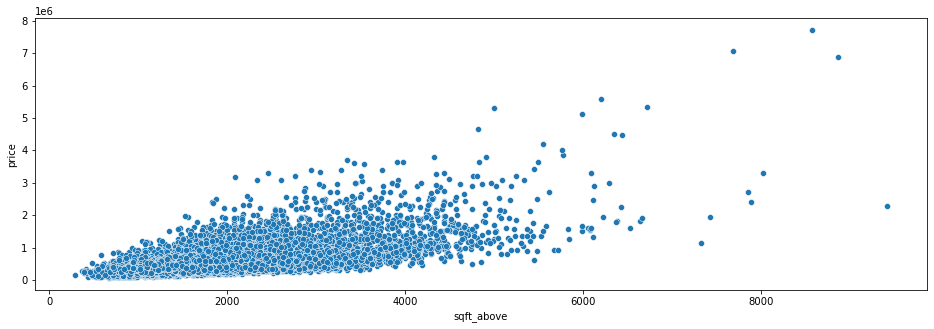

In [ ]:
#visualizing square footage of (home,lot,above and basement)
fig = plt.figure(figsize=(16,5))
sns.scatterplot(x=Data['sqft_above'], y=Data['price'])

<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

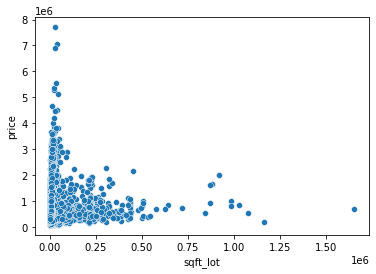

In [ ]:
sns.scatterplot(x=Data['sqft_lot'],y=Data['price'])

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

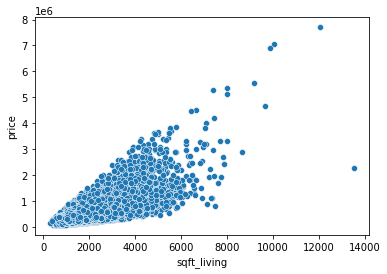

In [ ]:
sns.scatterplot(x=Data['sqft_living'],y=Data['price'])

<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

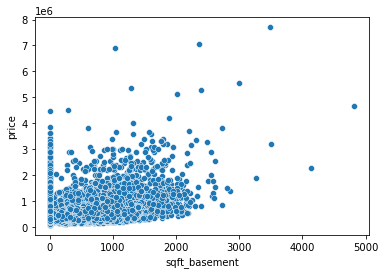

In [ ]:
sns.scatterplot(x=Data['sqft_basement'],y=Data['price'])

In [ ]:
Data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,0.114084,0.198372,0.713202,0.119248


In [ ]:
# check correlation
Data.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
Name: price, dtype: float64

<AxesSubplot:>

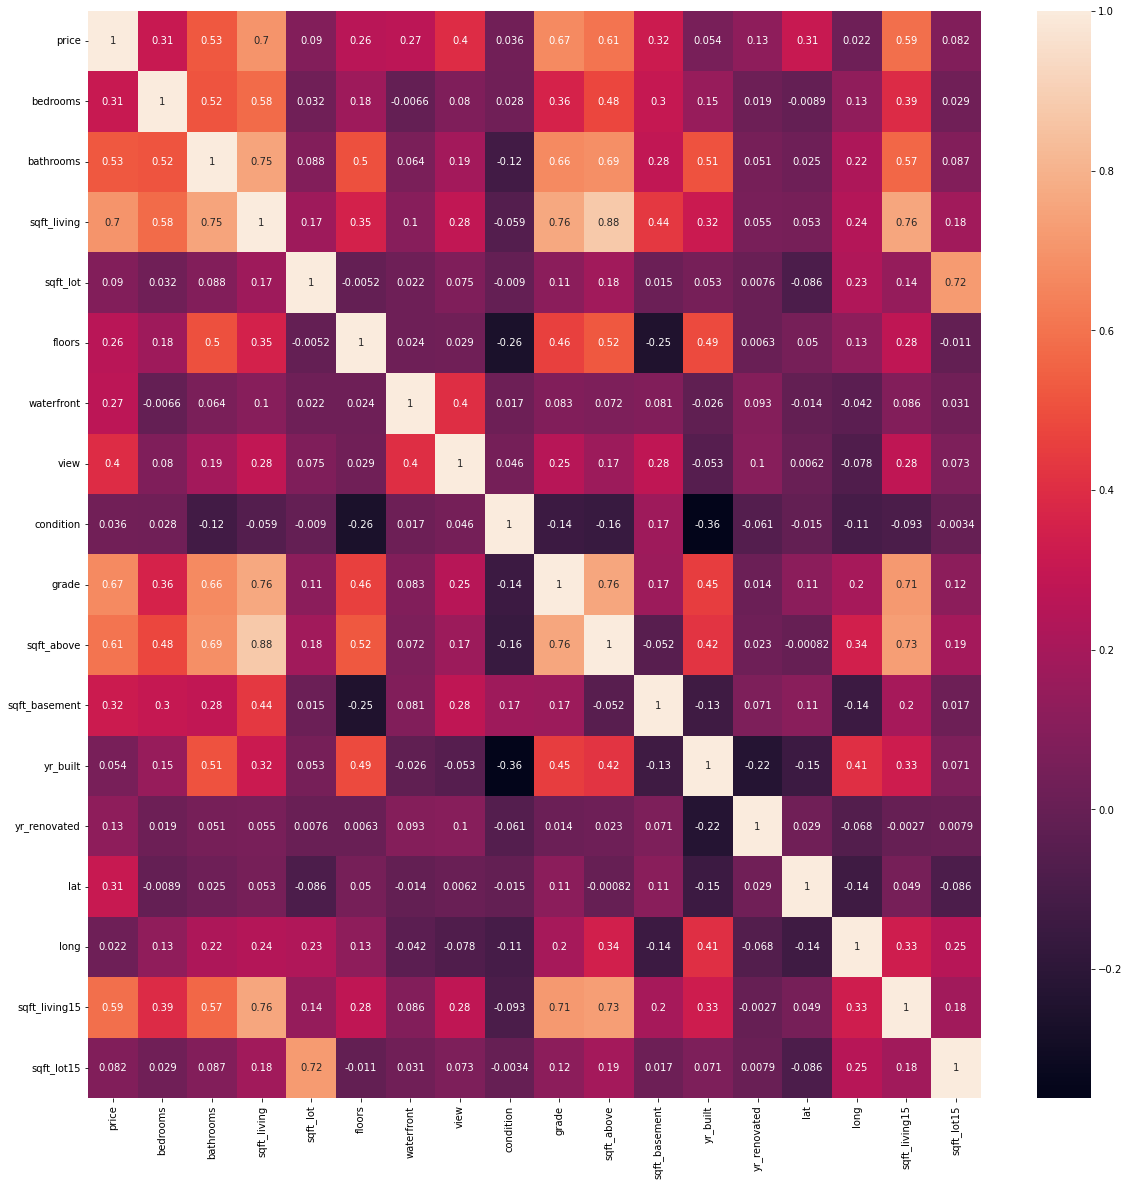

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(Data.corr(),annot=True)

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

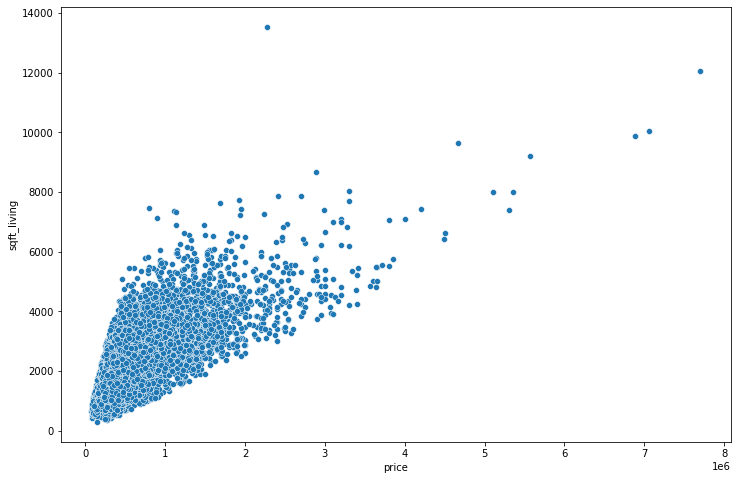

In [ ]:
# feature with higher correlation
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=Data)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

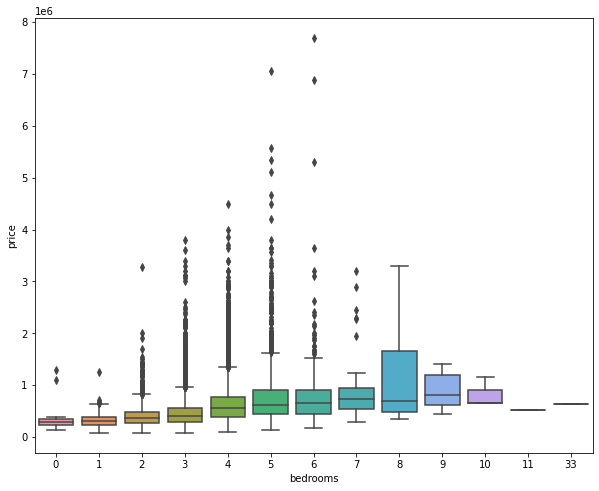

In [ ]:
# feature like number of bedroom or bathroom
plt.figure(figsize = (10,8))
sns.boxplot(x = 'bedrooms',y = 'price', data = Data)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

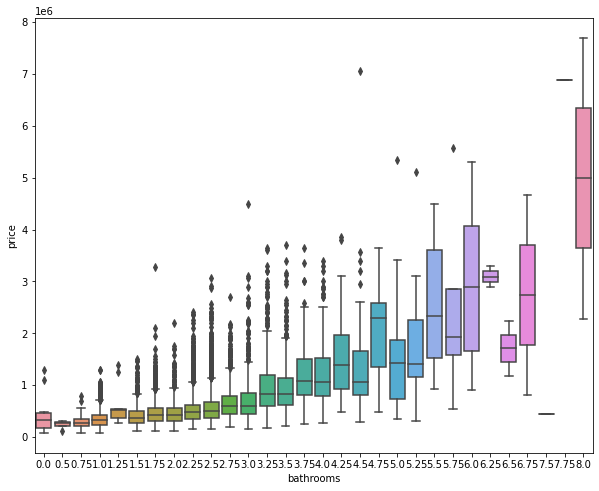

In [ ]:
# feature like number of bedroom or bathroom
plt.figure(figsize = (10,8))
sns.boxplot(x = 'bathrooms',y = 'price', data = Data)

In [ ]:
#let's break date to years, months
Data['date'] = pd.to_datetime(Data['date'])
Data['month'] = Data['date'].apply(lambda date:date.month)
Data['year'] = Data['date'].apply(lambda date:date.year)
Data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


<AxesSubplot:xlabel='year'>

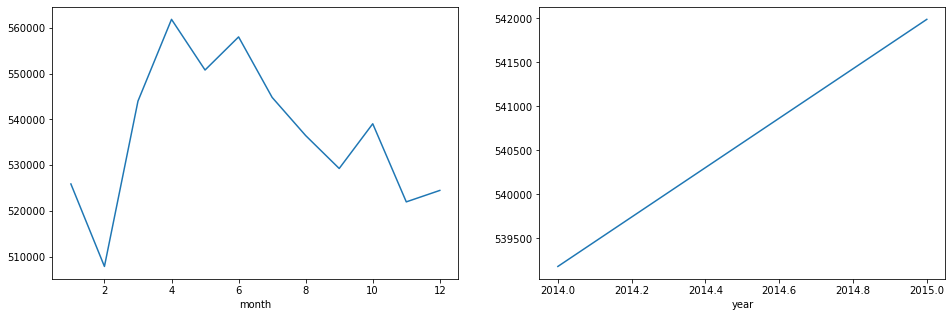

In [ ]:
# data visualization house price vs months and years
fig = plt.figure(figsize=(16,5))
fig.add_subplot(1,2,1)
Data.groupby('month').mean()['price'].plot()
fig.add_subplot(1,2,2)
Data.groupby('year').mean()['price'].plot()

In [ ]:
Data = Data.drop('date',axis=1)

Train Test Split


In [ ]:
X=Data['sqft_living']
y = Data['price']

#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Method1: Linear Regression

In [ ]:
#Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train.array.reshape(-1, 1), y_train)

#evaluate the model (intercept and slope)
print(regressor.intercept_)
print(regressor.coef_)

-37256.425368784345
[277.50853204]


In [ ]:
y_pred = regressor.predict(X_test.array.reshape(-1,1))


df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1

,Actual,Predicted
3834,349950.0,254127.533275
1348,450000.0,528860.979996
20366,635000.0,656514.904735
16617,355500.0,617663.710249
20925,246950.0,426182.823141
7891,406550.0,628764.051531
939,350000.0,401207.055257
10502,226500.0,395656.884616
2948,265000.0,351255.519489
5079,656000.0,592687.942366


In [ ]:
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred))) 
print('Mean Squared Error:{:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))  
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error: 172928.16
Mean Squared Error:68728174522.82
Root Mean Squared Error:262160.59


In [ ]:
print('Linear Regression Model:')
print("Train Score {:.2f}".format(regressor.score(X_train.array.reshape(-1, 1),y_train)))
print("Test Score {:.2f}".format(regressor.score(X_test.array.reshape(-1, 1), y_test)))

Linear Regression Model:
Train Score 0.48
Test Score 0.51
